In [27]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

font_dirs = ['./font'] # 폰트경로
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Noto Sans CJK KR'
%config InlineBackend.figure_format = 'retina'

In [28]:
df1 = pd.read_csv('./data/지역별 방문자수 비교_20210621 (1).csv')
df2 = pd.read_csv('./data/지역별 방문자수 비교_20210621 (2).csv')
df3 = pd.read_csv('./data/지역별 방문자수 비교_20210621 (3).csv')
df4 = pd.read_csv('./data/지역별 방문자수 비교_20210621 (4).csv')


In [29]:
df = pd.concat([df1,df2,df3,df4]).reset_index(drop=True)
df

,년,월,광역지자체,현지인(a),외지인(b),외국인(c),내국인(a+b),외부방문자(b+c),전체방문자(a+b+c)
0,2019,1,서울특별시,"130,981,176","49,167,240","1,881,982","180,148,416","51,049,223","182,030,398"
1,2019,1,부산광역시,"38,855,149","11,674,128","294,616","50,529,276","11,968,743","50,823,892"
2,2019,1,대구광역시,"35,297,808","8,475,849","56,553","43,773,657","8,532,401","43,830,209"
3,2019,1,인천광역시,"34,362,241","13,430,781","664,603","47,793,021","14,095,384","48,457,625"
4,2019,1,광주광역시,"22,031,391","5,140,044","25,293","27,171,435","5,165,337","27,196,728"
...,...,...,...,...,...,...,...,...,...
488,2021,3,제주특별자치도,"16,332,333","4,788,963","35,769","21,121,296","4,824,731","21,157,065"
489,2021,4,경상남도,"44,405,550","10,733,632","45,777","55,139,182","10,779,409","55,184,959"
490,2021,4,제주특별자치도,"15,700,405","5,049,282","36,302","20,749,687","5,085,584","20,785,989"
491,2021,5,경상남도,"47,054,283","12,268,557","50,366","59,322,840","12,318,923","59,373,206"


In [30]:
def string_to_numeric(d):
    d = d.replace(',','')
    return int(d)
df[['현지인(a)','외지인(b)','외국인(c)','내국인(a+b)','외부방문자(b+c)','전체방문자(a+b+c)']] = df[['현지인(a)','외지인(b)','외국인(c)','내국인(a+b)','외부방문자(b+c)','전체방문자(a+b+c)']].applymap(string_to_numeric)

In [31]:
df['광역지자체'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [39]:
df = df.set_index(['년','월'])

### 현지인의 증가가 눈에 띔
#### 현지인의 2020 1,2월 기준 감소와 2021 2월 백신 이후의 증가
#### 오히려 외지인의 감소가 일어남

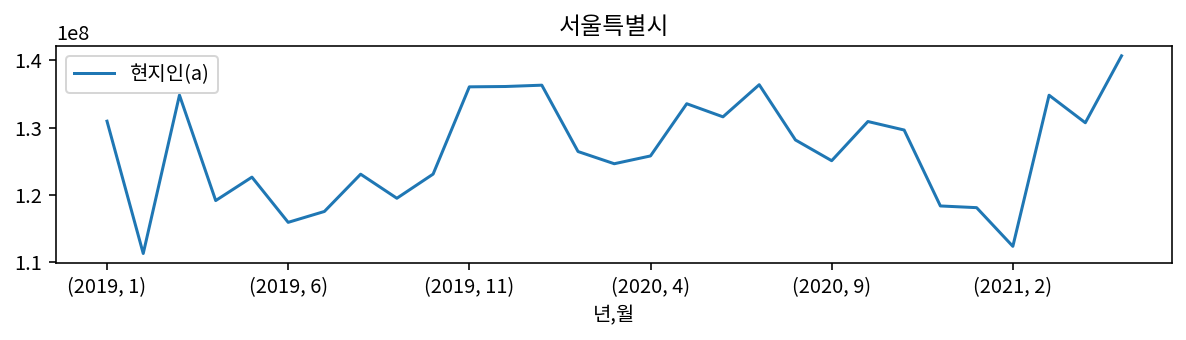

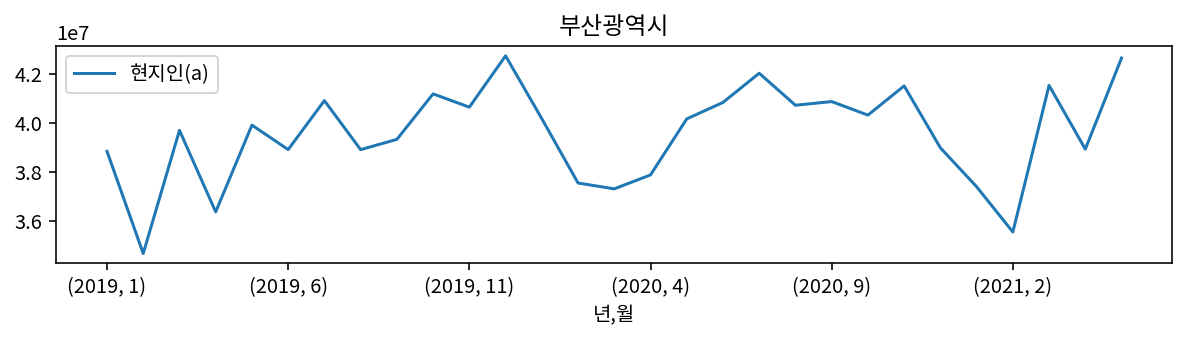

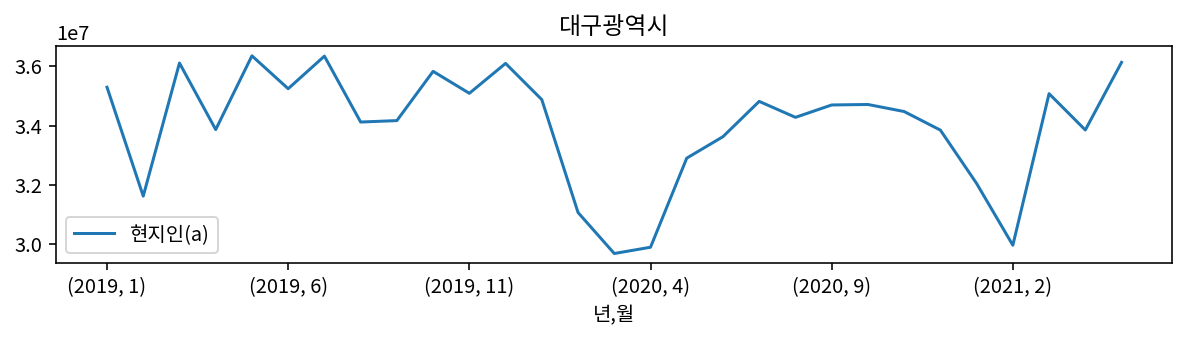

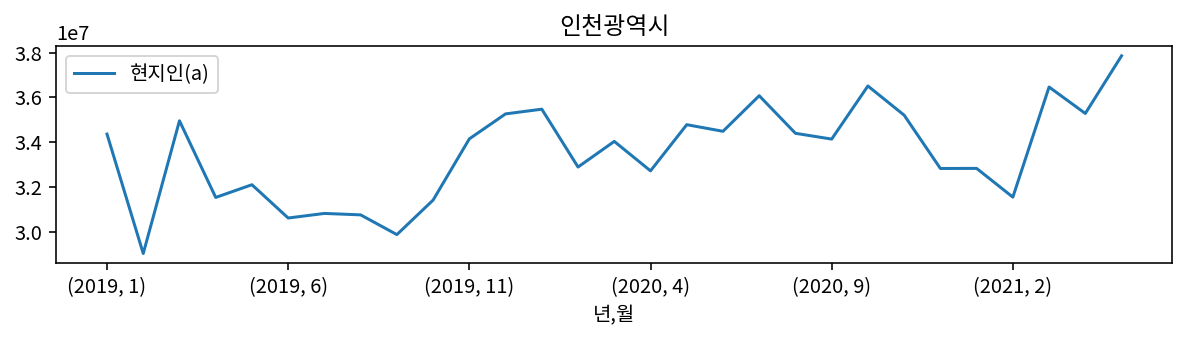

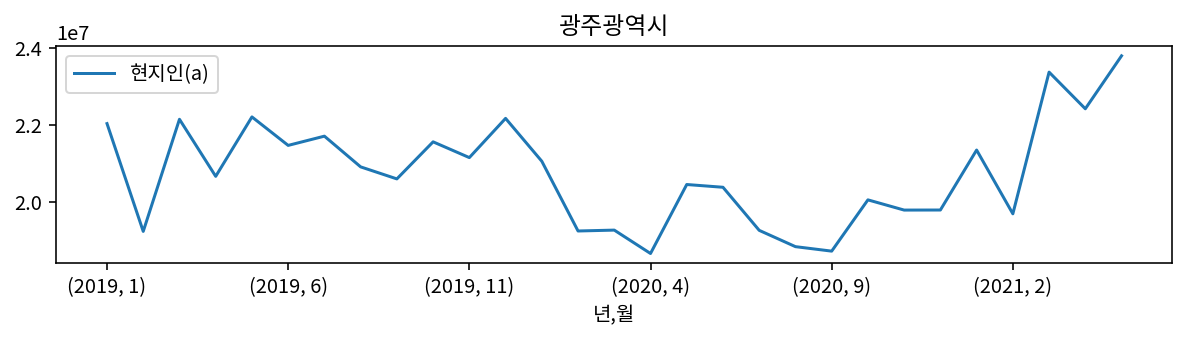

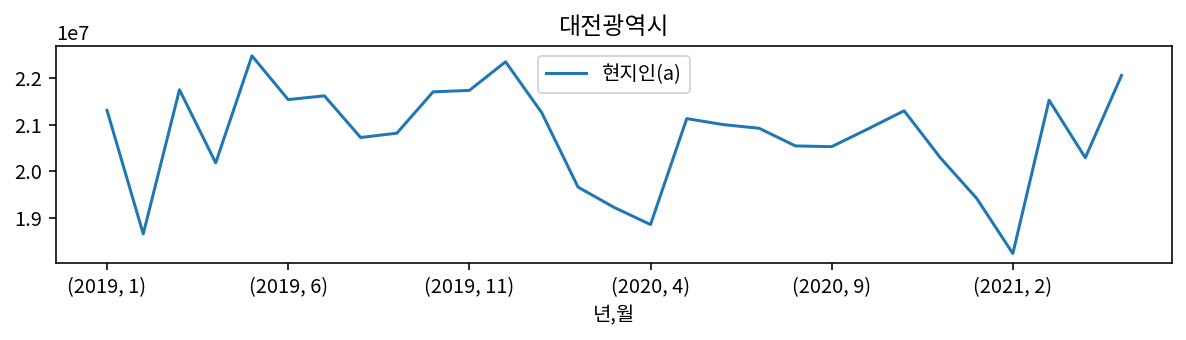

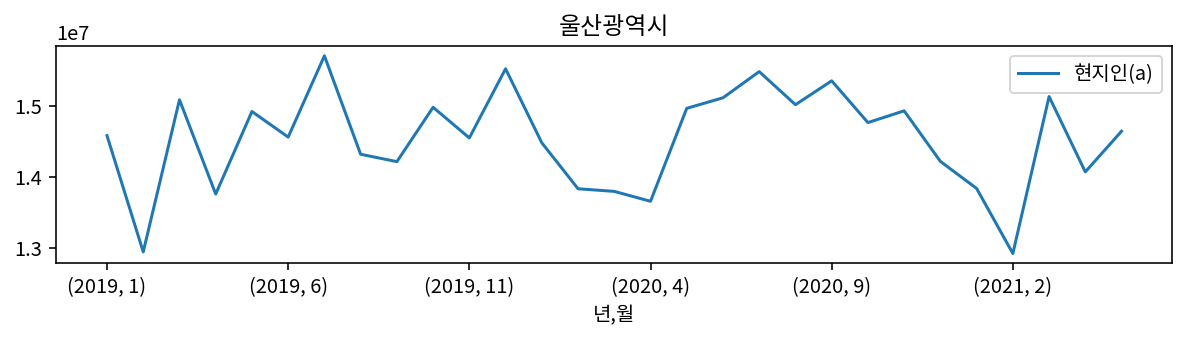

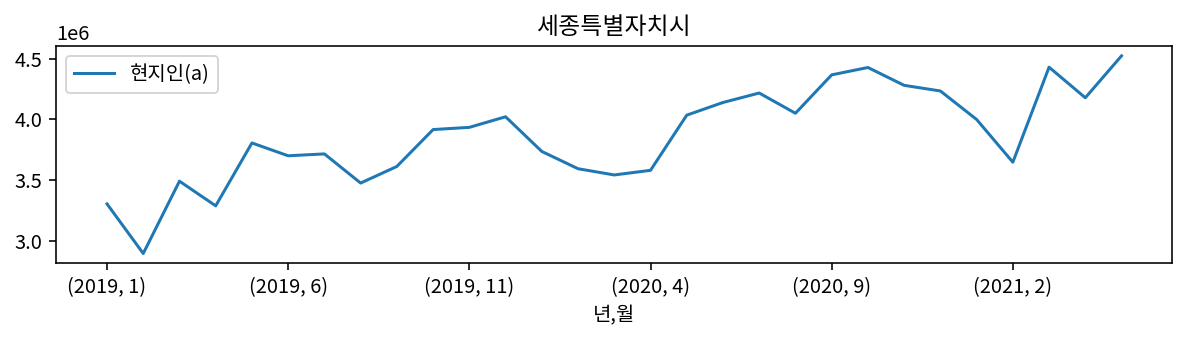

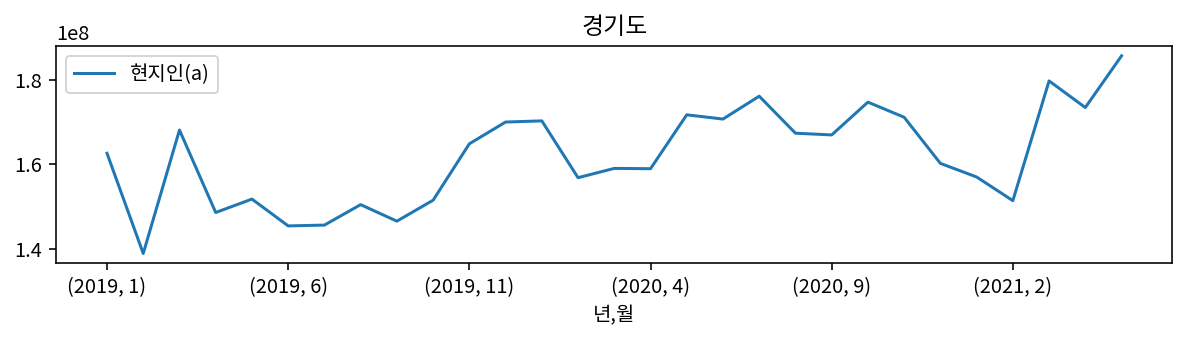

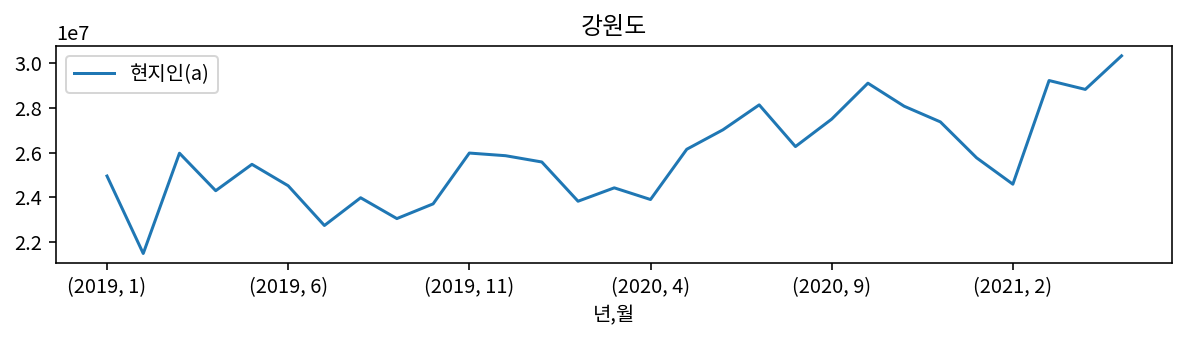

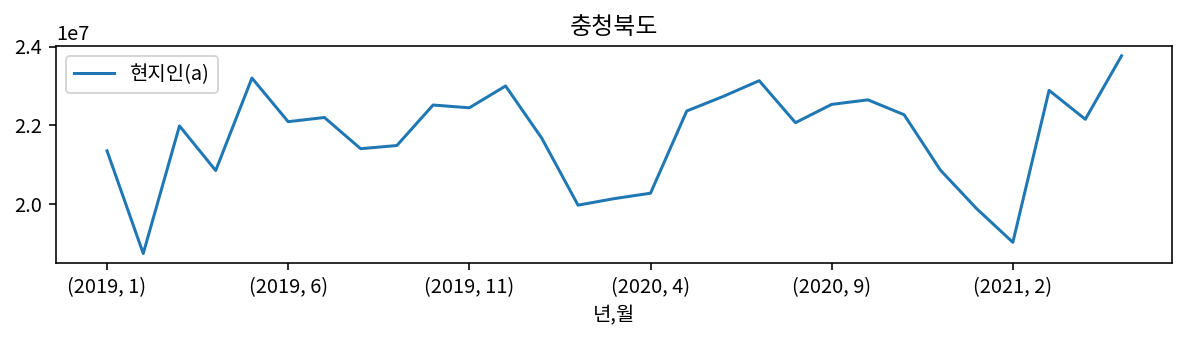

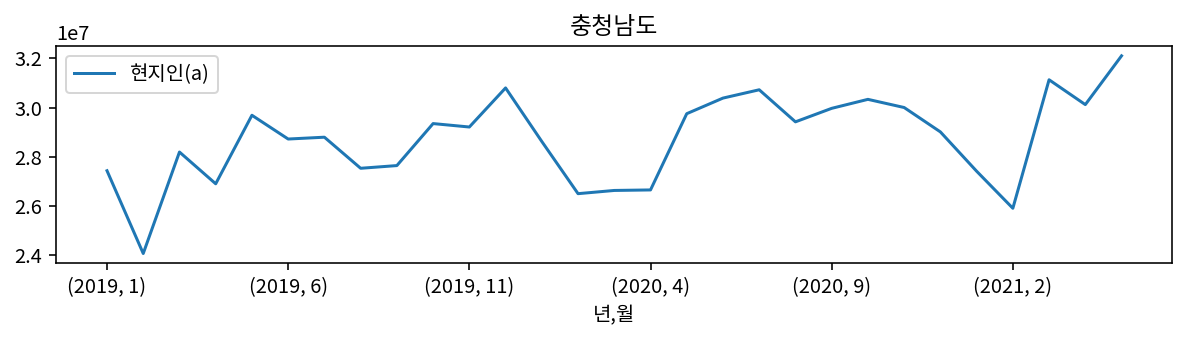

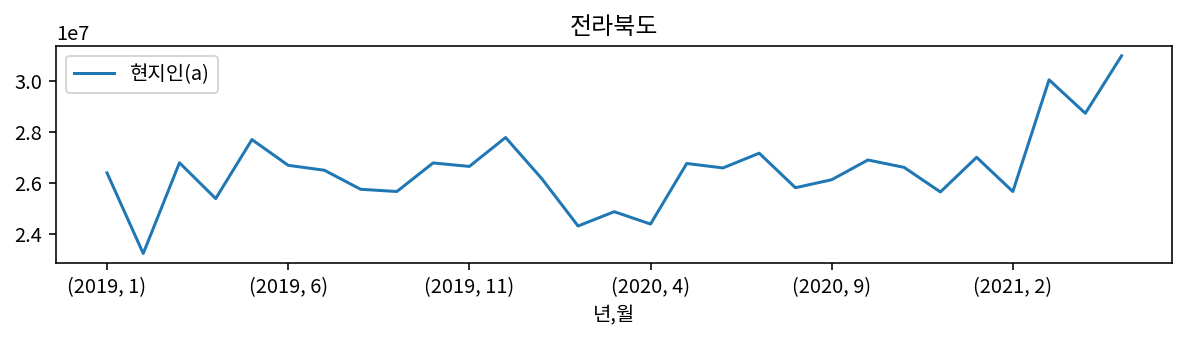

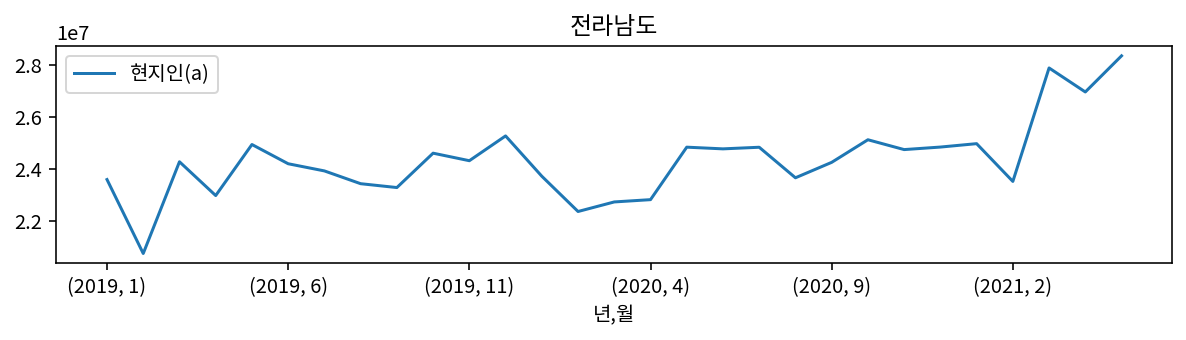

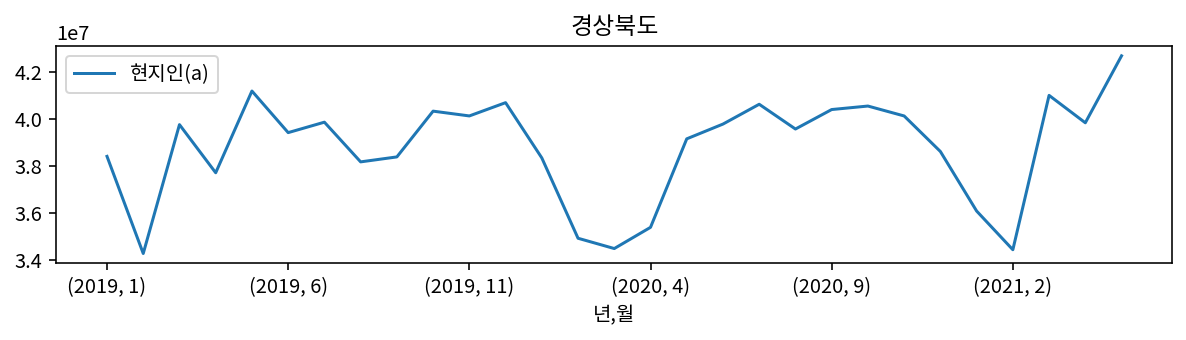

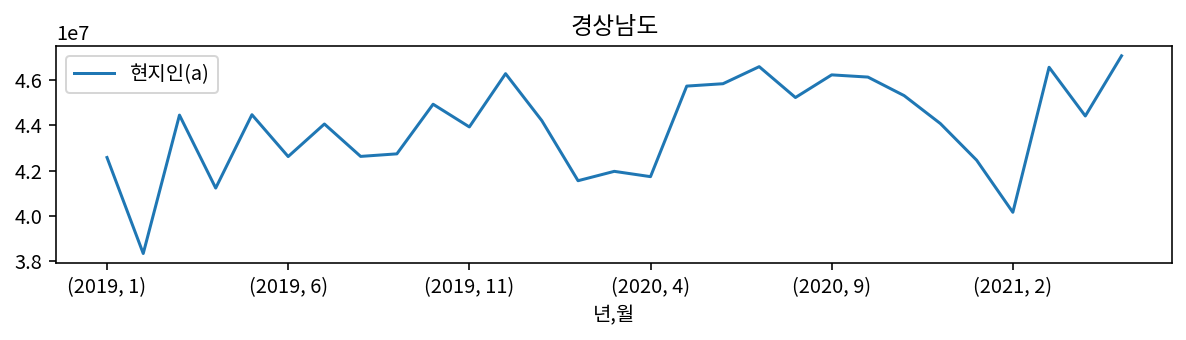

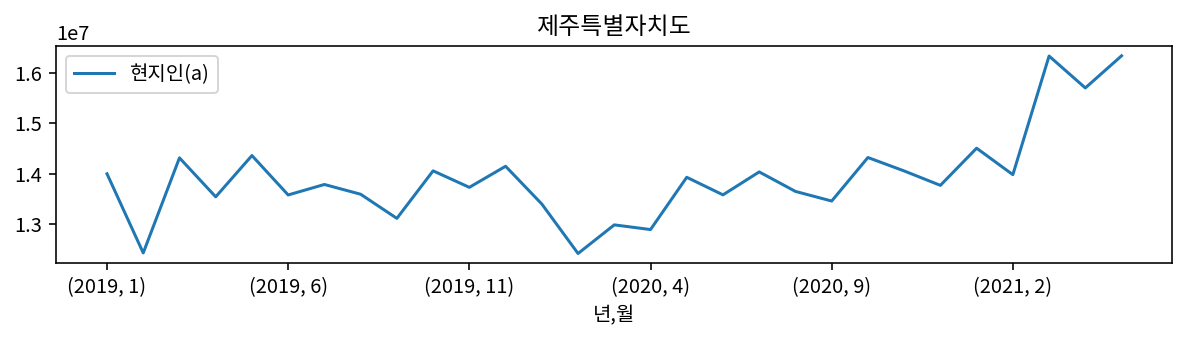

In [51]:
# fig, ax = plt.subplots(6,3, figsize=(7,7))
row, col =0,0
for isido in df['광역지자체'].unique():
    df[df['광역지자체']==isido][['현지인(a)']].plot.line(figsize=(10,2), title=isido)


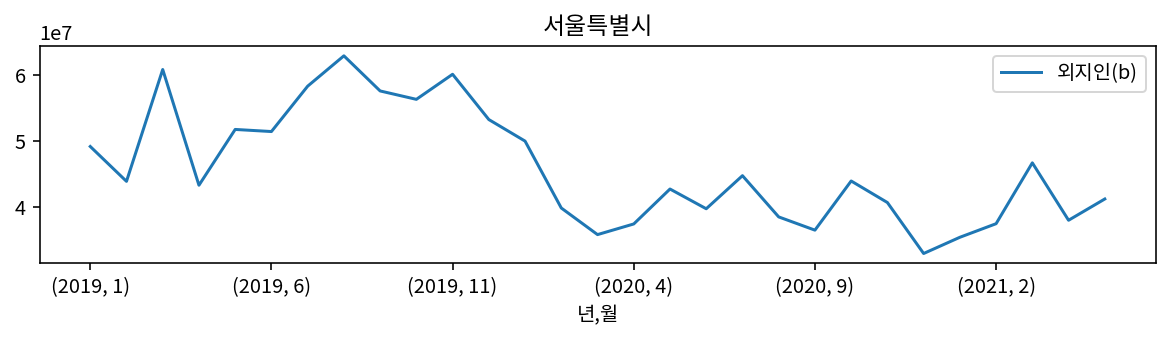

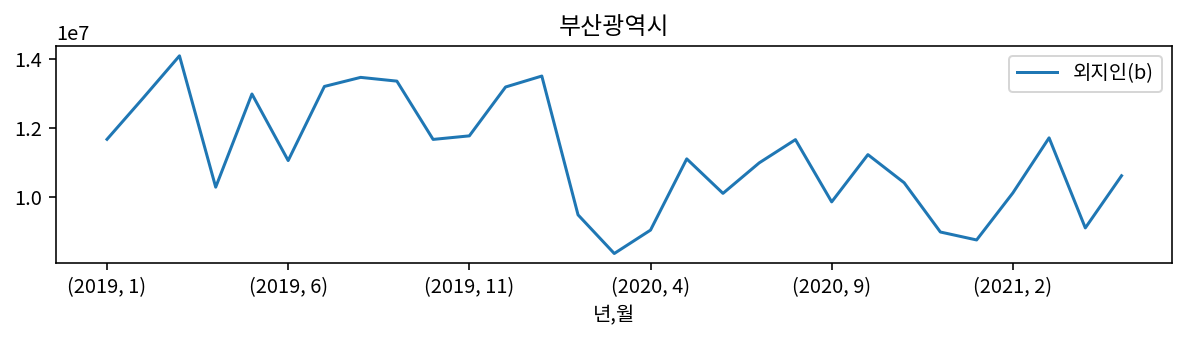

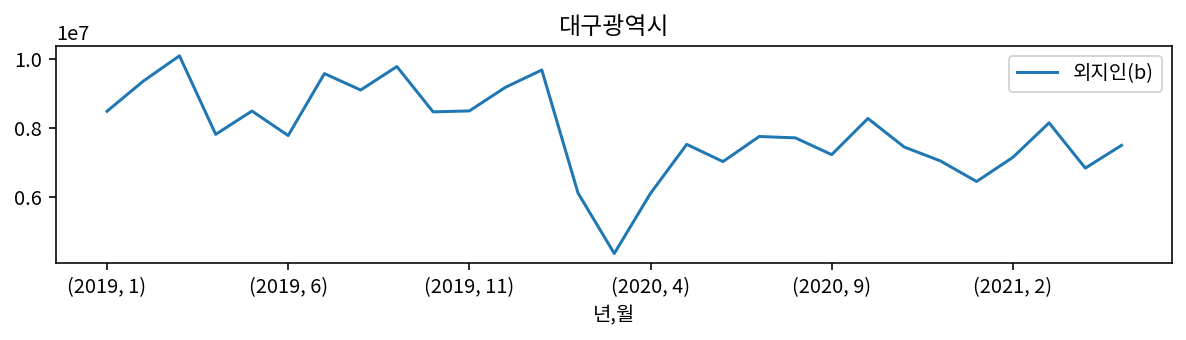

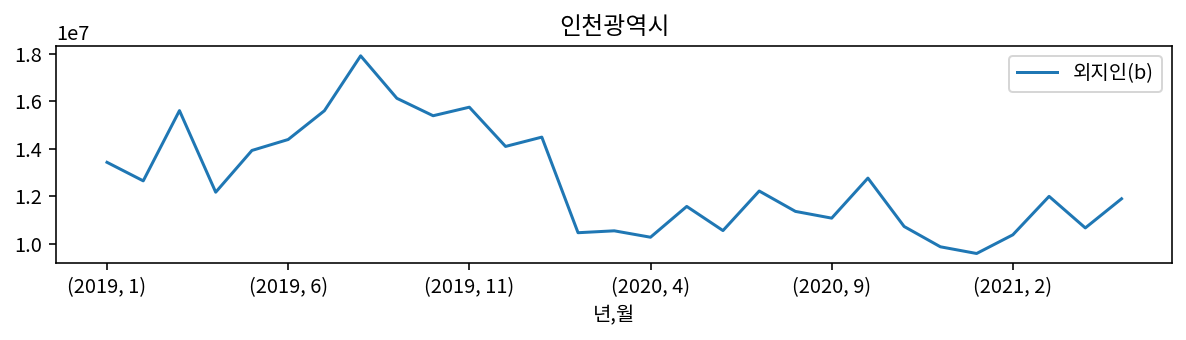

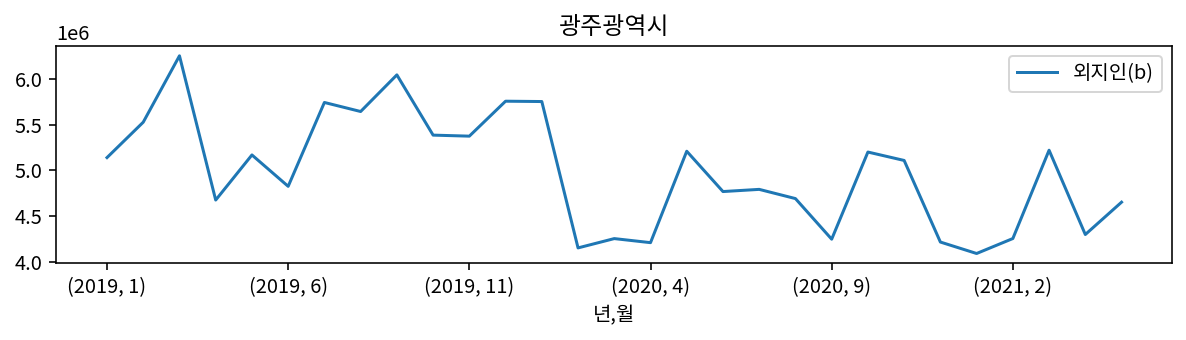

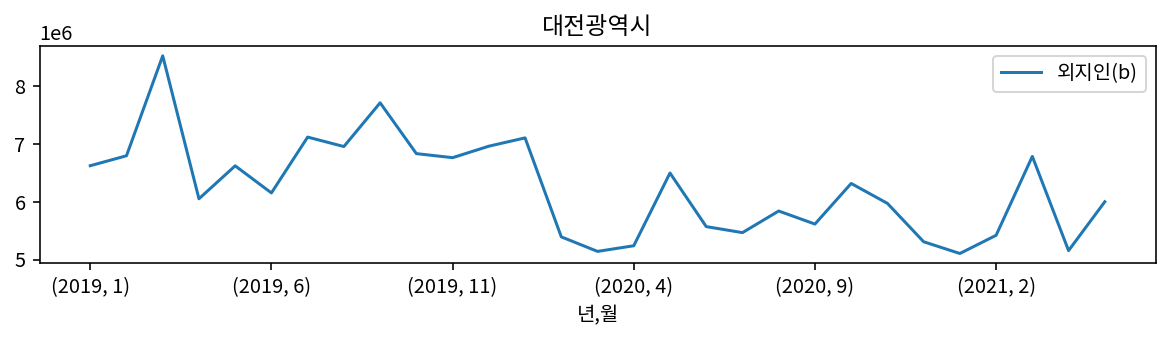

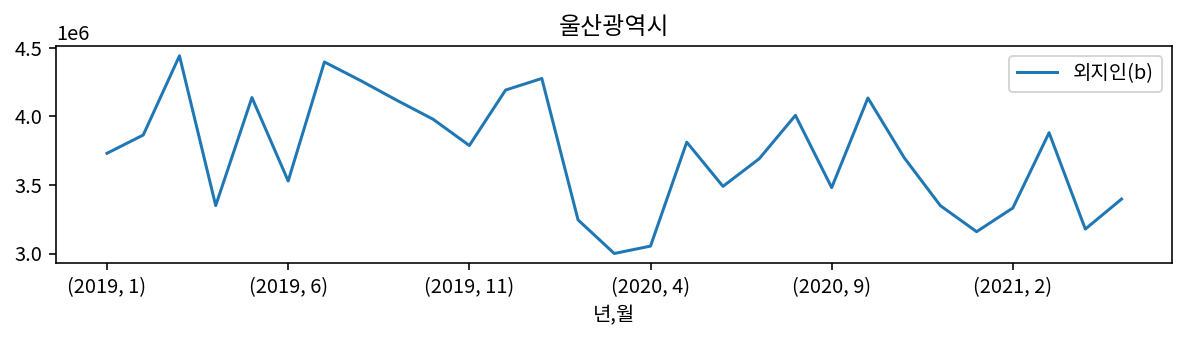

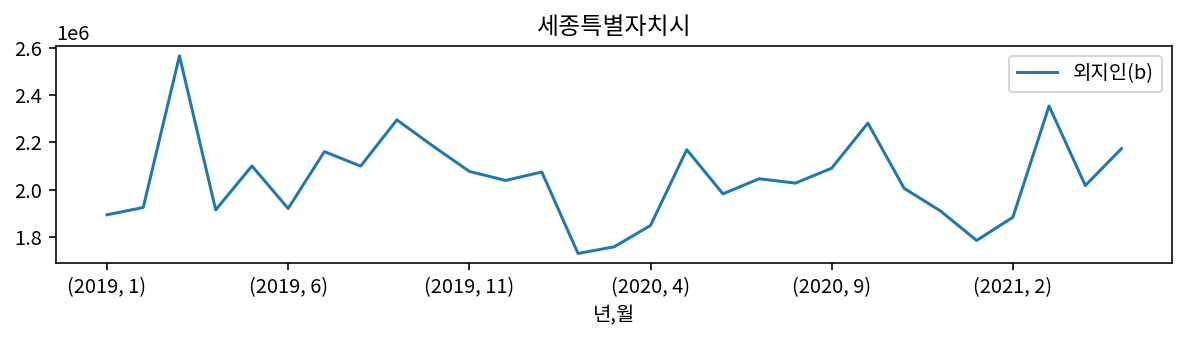

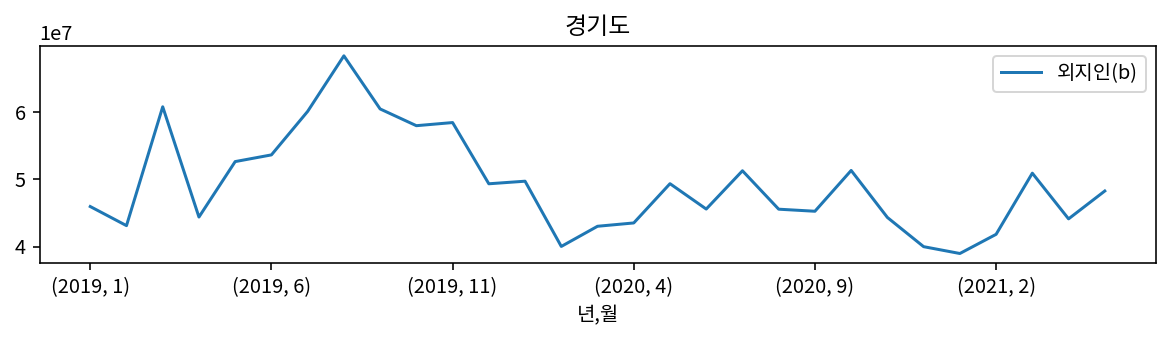

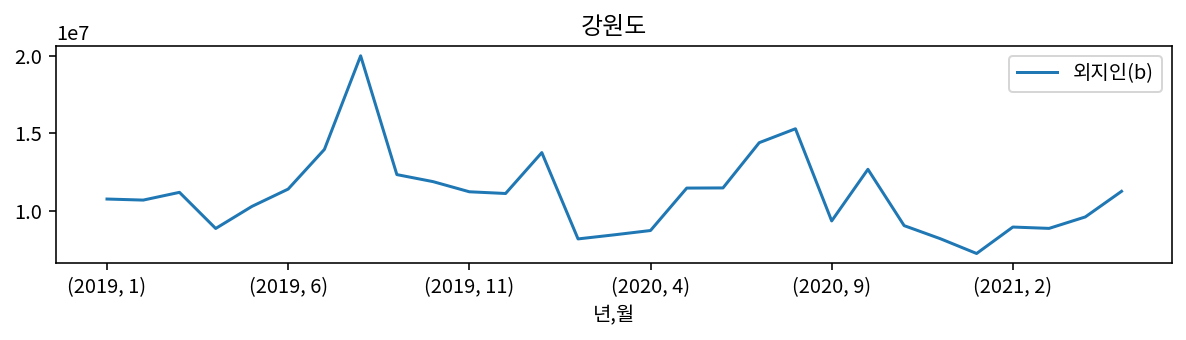

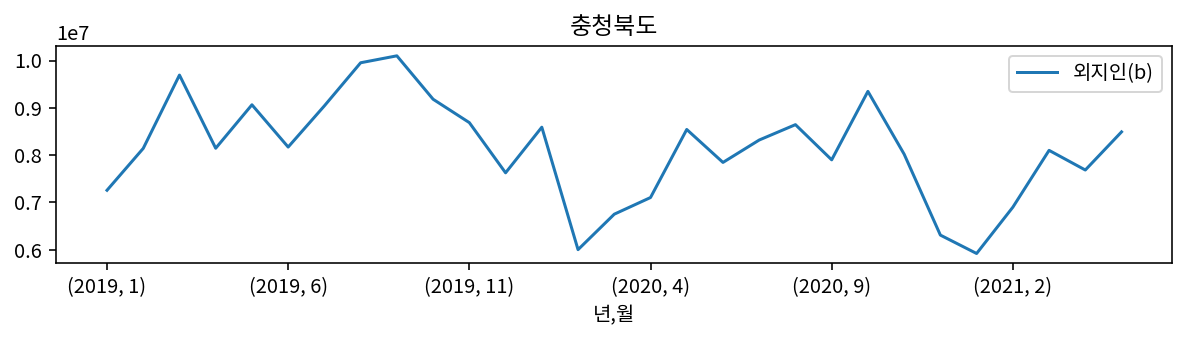

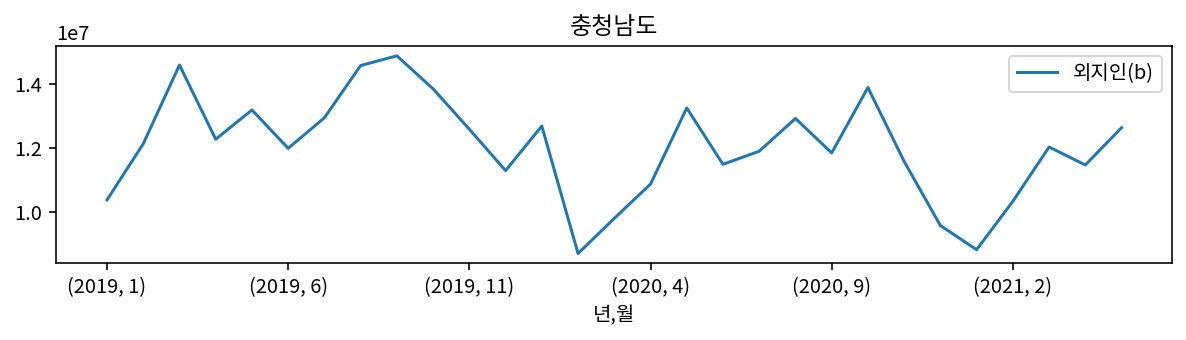

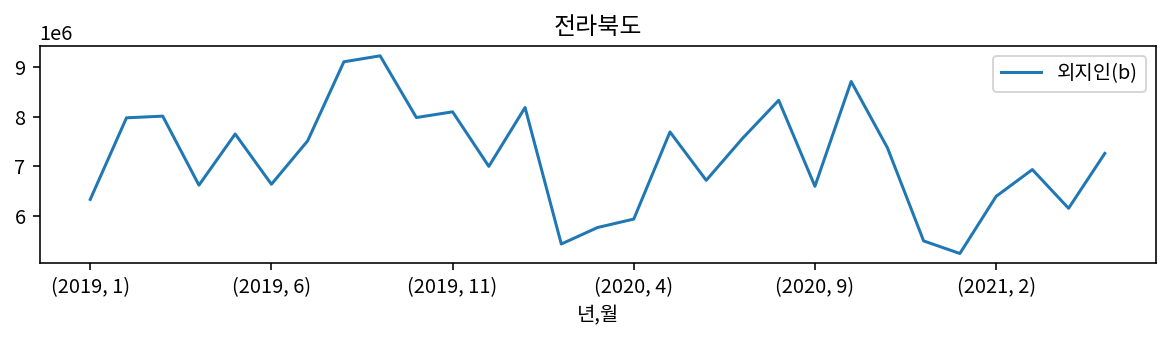

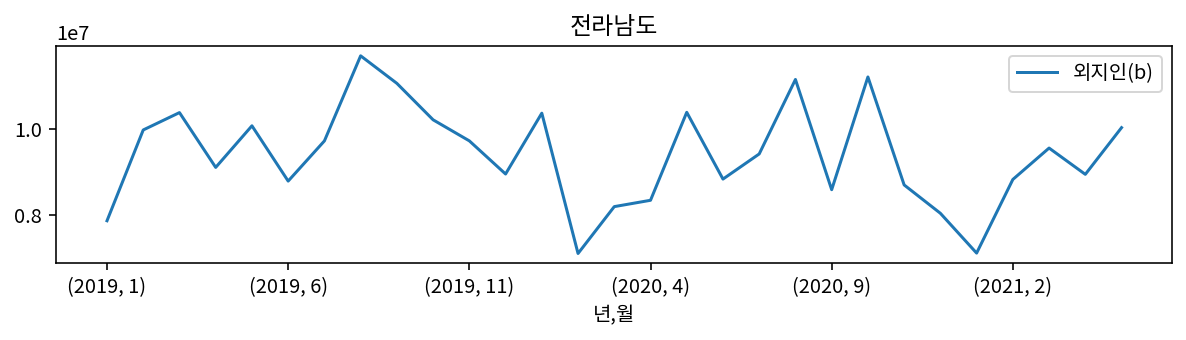

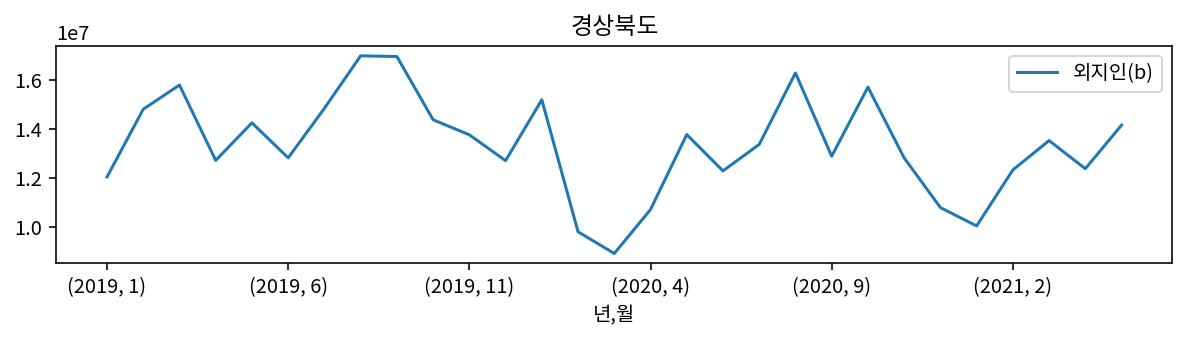

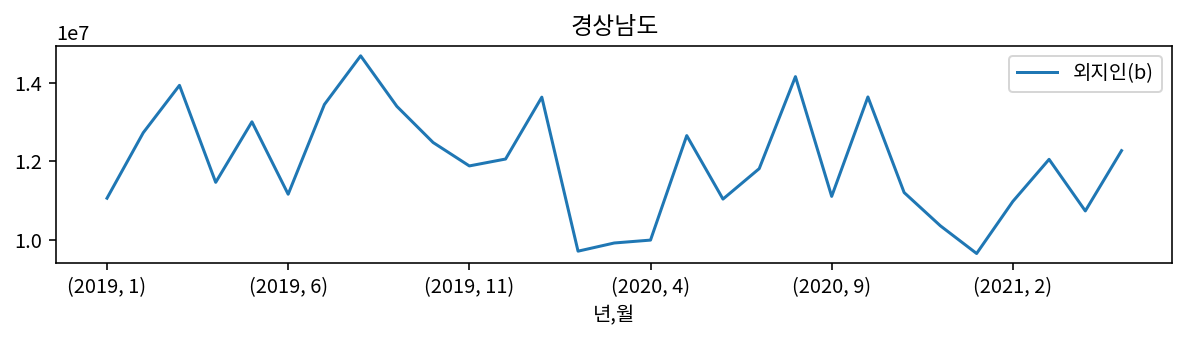

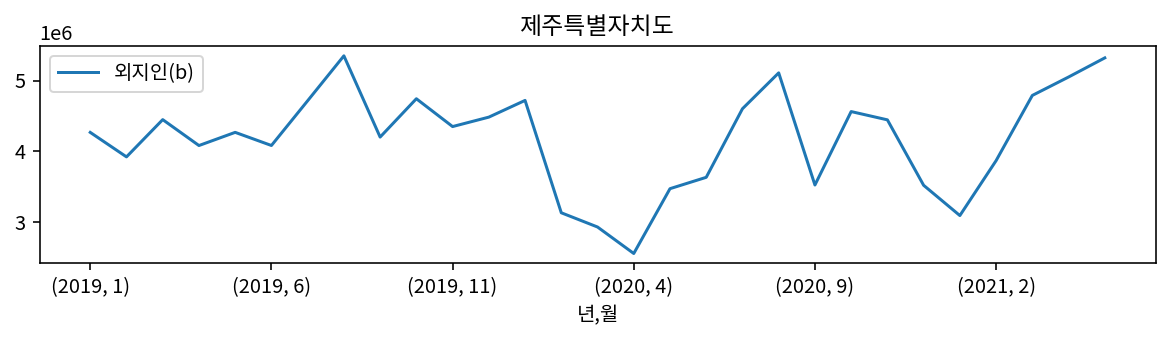

In [52]:
for isido in df['광역지자체'].unique():
    df[df['광역지자체']==isido][['외지인(b)']].plot.line(figsize=(10,2))
    plt.title(isido)
    plt.show()

In [4]:
df = pd.read_csv('./data/지역별 방문자수 비교_20210621 (5).csv')
df

,년,월,광역지자체,순위,광역지자체(거주지),기초지자체(거주지),방문자수,구성비(%)
0,2019,1,대전광역시,1,대전광역시,서구,"2,631,706",18.18
1,2019,1,대전광역시,2,대전광역시,유성구,"1,814,610",12.54
2,2019,1,대전광역시,3,대전광역시,중구,"1,431,070",9.89
3,2019,1,대전광역시,4,대전광역시,동구,"1,428,840",9.87
4,2019,1,대전광역시,5,대전광역시,대덕구,"1,162,417",8.03
...,...,...,...,...,...,...,...,...
2895,2021,5,강원도,16,강원도,양양군,"212,121",1.27
2896,2021,5,강원도,17,서울특별시,서초구,"193,438",1.16
2897,2021,5,강원도,18,경기도,용인시 기흥구,"192,633",1.16
2898,2021,5,강원도,19,경기도,의정부시,"192,098",1.15


In [5]:
df = pd.read_csv('./data/광역지자체 목적지 검색건수_20210621.csv')
df

Unnamed: 0  Unnamed: 1  \
광역지자체   구분            01         02                  03          04   
전국      전체            11,369,573 11,211,203  13,144,346  13,180,204   
        자연관광지         606,712    649,348        855,949   1,028,688   
        역사관광지         232,898    269,108        299,180     324,300   
        휴양관광지         239,952    254,529        252,366     265,223   
...                                                 ...         ...   
제주특별자치도 레포츠(육상/해상/항공) 14,446     16,034          18,711      21,865   
        쇼핑            19,968     19,774          21,932      21,545   
        식음료           227,693    222,801        242,422     244,662   
        숙박            102,339    102,121        107,366     115,137   
        기타관광지         71,952     68,361          72,170      74,627   

                                                   2019  Unnamed: 3  \
광역지자체   구분            01         02                  05          06   
전국      전체            11,369,573 11,211,203  15,331,841  15,694,410   
        자연관광지         606,712    649,348      1,288,188   1,273,800   
        역사관광지         232,898    269,108        410,472     341,343   
        휴양관광지         239,952    254,529        316,467     320,763   
...                                                 ...         ...   
제주특별자치도 레포츠(육상/해상/항공) 14,446     16,034          25,940      27,849   
        쇼핑            19,968     19,774          22,604      24,707   
        식음료           227,693    222,801        272,979     291,341   
        숙박            102,339    102,121        129,930     143,450   
        기타관광지         71,952     68,361          81,579      83,711   

                                             Unnamed: 4  Unnamed: 5  \
광역지자체   구분            01         02                  07          08   
전국      전체            11,369,573 11,211,203  15,856,655  19,776,676   
        자연관광지         606,712    649,348      1,159,988   1,731,531   
        역사관광지         232,898    269,108        298,582     418,403   
        휴양관광지         239,952    254,529        300,837     427,366   
...                                                 ...         ...   
제주특별자치도 레포츠(육상/해상/항공) 14,446     16,034          27,646      36,397   
        쇼핑            19,968     19,774          24,946      27,761   
        식음료           227,693    222,801        311,328     395,940   
        숙박            102,339    102,121        157,086     198,692   
        기타관광지         71,952     68,361          81,064      98,043   

                                             Unnamed: 6  Unnamed: 7  \
광역지자체   구분            01         02                  09          10   
전국      전체            11,369,573 11,211,203  14,479,165  17,577,844   
        자연관광지         606,712    649,348      1,052,006   1,440,271   
        역사관광지         232,898    269,108        315,223     450,709   
        휴양관광지         239,952    254,529        249,065     338,721   
...                                                 ...         ...   
제주특별자치도 레포츠(육상/해상/항공) 14,446     16,034          23,348      33,798   
        쇼핑            19,968     19,774          19,413      22,218   
        식음료           227,693    222,801        275,920     338,653   
        숙박            102,339    102,121        127,126     159,530   
        기타관광지         71,952     68,361          70,495      96,554   

                                             Unnamed: 8  Unnamed: 9  ...  \
광역지자체   구분            01         02                  11          12  ...   
전국      전체            11,369,573 11,211,203  15,984,840  16,515,922  ...   
        자연관광지         606,712    649,348        966,080     708,412  ...   
        역사관광지         232,898    269,108        377,312     275,396  ...   
        휴양관광지         239,952    254,529        249,806     256,812  ...   
...                                                 ...         ...  ...   
제주특별자치도 레포츠(육상/해상/항공) 14,446     16,034          29,034      22,840  ...   
        쇼핑            19,

In [6]:
df = pd.read_csv('./data/광역지자체 관광지출액_20210621.csv')
df

Unnamed: 0  \
지역      구분         01                02                                03   
전국      총소비        1,626,703,667,130 1,538,113,279,405  1,764,807,242,399   
        숙박업        49,996,449,699    47,195,003,175        45,462,779,889   
        여행업        9,451,076,265     5,866,705,399          5,335,203,008   
        대중교통       66,681,168,630    59,058,969,697        63,865,838,215   
...                                                                   ...   
제주특별자치도 레저스포츠      1,372,749,439     1,601,765,623          2,062,720,697   
        면세점        13,354,198,442    13,971,222,981        14,954,867,720   
        문화서비스      543,733,645       680,361,710              545,400,418   
        쇼핑(면세점 제외) 2,085,108,966     2,100,402,835          2,336,435,202   
        식음료        15,334,908,877    14,759,247,768        15,702,981,339   

                                                               Unnamed: 1  \
지역      구분         01                02                                04   
전국      총소비        1,626,703,667,130 1,538,113,279,405  1,719,807,697,479   
        숙박업        49,996,449,699    47,195,003,175        44,332,744,646   
        여행업        9,451,076,265     5,866,705,399          6,341,655,126   
        대중교통       66,681,168,630    59,058,969,697        65,669,222,294   
...                                                                   ...   
제주특별자치도 레저스포츠      1,372,749,439     1,601,765,623          2,300,551,201   
        면세점        13,354,198,442    13,971,222,981        15,402,484,491   
        문화서비스      543,733,645       680,361,710              699,680,266   
        쇼핑(면세점 제외) 2,085,108,966     2,100,402,835          2,481,578,305   
        식음료        15,334,908,877    14,759,247,768        16,549,626,129   

                                                                     2019  \
지역      구분         01                02                                05   
전국      총소비        1,626,703,667,130 1,538,113,279,405  1,908,633,089,253   
        숙박업        49,996,449,699    47,195,003,175        48,261,718,399   
        여행업        9,451,076,265     5,866,705,399          5,811,565,864   
        대중교통       66,681,168,630    59,058,969,697        67,619,030,192   
...                                                                   ...   
제주특별자치도 레저스포츠      1,372,749,439     1,601,765,623          2,786,153,928   
        면세점        13,354,198,442    13,971,222,981        15,945,552,647   
        문화서비스      543,733,645       680,361,710              885,275,102   
        쇼핑(면세점 제외) 2,085,108,966     2,100,402,835          2,850,364,229   
        식음료        15,334,908,877    14,759,247,768        17,453,311,760   

                                                               Unnamed: 3  \
지역      구분         01                02                                06   
전국      총소비        1,626,703,667,130 1,538,113,279,405  1,805,411,651,074   
        숙박업        49,996,449,699    47,195,003,175        48,506,443,868   
        여행업        9,451,076,265     5,866,705,399          5,211,042,046   
        대중교통       66,681,168,630    59,058,969,697        63,031,916,138   
...                                                                   ...   
제주특별자치도 레저스포츠      1,372,749,439     1,601,765,623          2,898,012,324   
        면세점        13,354,198,442    13,971,222,981        13,950,046,386   
        문화서비스      543,733,645       680,361,710              838,800,195   
        쇼핑(면세점 제외) 2,085,108,966     2,100,402,835          2,745,184,887   
        식음료        15,334,908,877    14,759,247,768        18,153,473,752   

                                                               Unnamed: 4  \
지역      구분         01                02                                07   
전국      총소비        1,626,703,667,130 1,538,113,279,405  1,785,880,960,792   
        숙박업        49,996,449,699    47,195,003,175        51,608,157,115   
        여행업        9,451,076,265     5,866,705,399     